In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
from mpl_toolkits.axisartist.axislines import AxesZero
from mpl_toolkits.axisartist.axislines import Axes

In [3]:
def plotWallPotCirc(x, y, R, A, L, RP):
    r = np.sqrt(x**2 + y**2)
    if (r+RP>=R):
        fx = -2*A*(r-(R-RP))*x/r
    else:
        fx = -2*A*(r-(R-RP))*x*(np.exp((r-(R-RP))/L))/r
    return fx

def plotWallPotCircOld(x, y, R, A, L, RP):
    r = np.sqrt(x**2 + y**2)
    if (r+RP>=R):
        fx = -2*A*(r-(R-RP))*x/r
    else:
        fx = 0
    return fx

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def plotWallPot(x, y, R, A, RP):
    r = np.sqrt(x**2 + y**2)
    if (x+RP>=R):
        fx = -2*A*(x-(R-RP))
    elif ((x+RP<R) and (x>=0)):
        fx = -2*A*(x-(R-RP))*sigmoid((x-50*R/51)/0.9)
    if (x-RP<=-R):
        fx = -2*A*(x-(-R+RP))
    elif ((x-RP>-R) and (x<=0)):
        fx = -2*A*(x-(-R+RP))*sigmoid(-(x+50*R/51)/0.9)
    return fx

def plotWallPotOld(x, y, R, A, RP):
    r = np.sqrt(x**2 + y**2)
    fx = 0
    if (x+RP>=R):
        fx = -2*A*(x-(R-RP))
    if (x-RP<=-R):
        fx = -2*A*(x-(-R+RP))
    return fx

def plotsimForce(rij, RP1, RP2, C = 1):
    h = RP1+RP2-rij
    if (h>0):
        return C*np.sqrt(h**3*RP1*RP2/(RP1+RP2))
    else:
        return 0
    
def plotIntPot(K, K4, r, rij):
    return 0.5*K*(r-rij)**2 + 0.25*K4*(r-rij)**4

def plotIntForce(K, K4, r, rij):
    return K*(r-rij) + K4*(r-rij)**3

<ipython-input-4-bc7ff9c630ab>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(["", "", ""])
<ipython-input-4-bc7ff9c630ab>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(["", "(0, 0)", "", "","", r"$RP_i+RP_j$", "", "", ""])


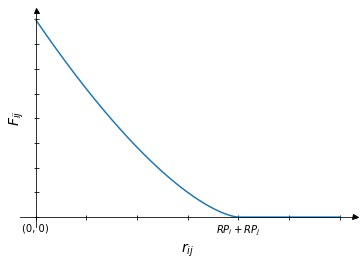

In [4]:
RP1 = 1.0
RP2 = 1.0
C= 40
r12 = np.linspace(0, RP1+RP2+1, 10000)
fxrect=np.zeros(len(r12))
for i in range(len(r12)):
    fxrect[i] = plotsimForce(r12[i], RP1, RP2, C)


rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}
with plt.rc_context(rc):
    fig, ax = plt.subplots()
    ax.plot(r12, fxrect)

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    # ax.yaxis.set_ticklabels(["", "", "5", "10", "15", "20", "25"])
    # ax.xaxis.set_ticklabels(["", "0", "0.5", "1", "1.5", "2", "2.5", "3"])

    # make arrows
    ax.plot((1), (0), ls="", marker=">", ms=5, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((0), (1), ls="", marker="^", ms=5, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
    
    ax.yaxis.set_ticklabels(["", "", ""])
    ax.xaxis.set_ticklabels(["", "(0, 0)", "", "","", r"$RP_i+RP_j$", "", "", ""])
    plt.xlabel(r'$r_{ij}$', fontsize=14)
    plt.ylabel(r'$F_{ij}$', fontsize=14)
    plt.savefig("simForce.svg")
    plt.show()


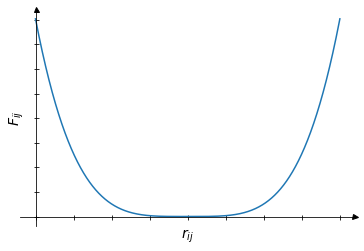

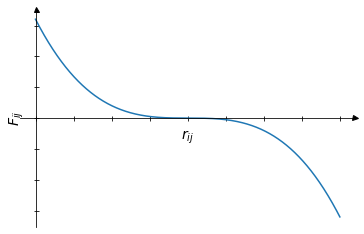

In [131]:
K = 200
K4 = K/(0.1*0.1)
r = 2.0
rij = np.linspace(0, 2*r, 10000)
fpot = np.zeros(len(rij))
ffor = np.zeros(len(rij))

for i in range(len(rij)):
    fpot[i] = plotIntPot(K, K4, r, rij[i])
    ffor[i] = plotIntForce(K, K4, r, rij[i])

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}
with plt.rc_context(rc):
    fig, ax = plt.subplots()
    ax.plot(rij, fpot)

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_ticklabels([])
    ax.xaxis.set_ticklabels([])

    # make arrows
    ax.plot((1), (0), ls="", marker=">", ms=5, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((0), (1), ls="", marker="^", ms=5, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
    
    plt.xlabel(r'$r_{ij}$', fontsize=14)
    plt.ylabel(r'$F_{ij}$', fontsize=14)
    plt.savefig("simpotint.svg")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(rij, ffor)

#     ax.spines['left'].set_position('zero')
    ax.spines['left'].set_position(('data', 0))
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_ticklabels([])
    ax.xaxis.set_ticklabels([])
    # make arrows
    ax.plot((1), (0), ls="", marker=">", ms=5, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((0), (1), ls="", marker="^", ms=5, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)

    plt.xlabel(r'$r_{ij}$', fontsize=14)
    plt.ylabel(r'$F_{ij}$', fontsize=14)
#     plt.xlim(0.75, 3)
    plt.savefig("simforint.svg")
    plt.show()


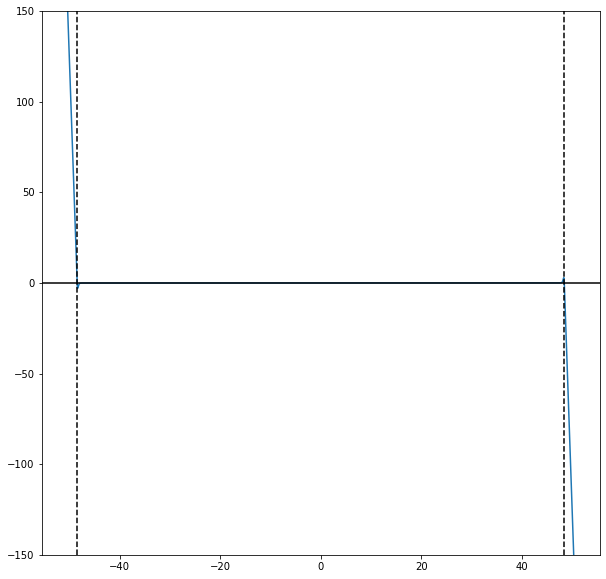

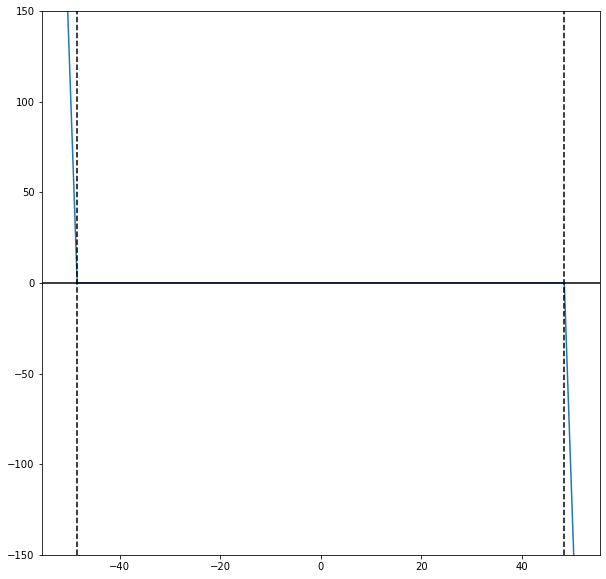

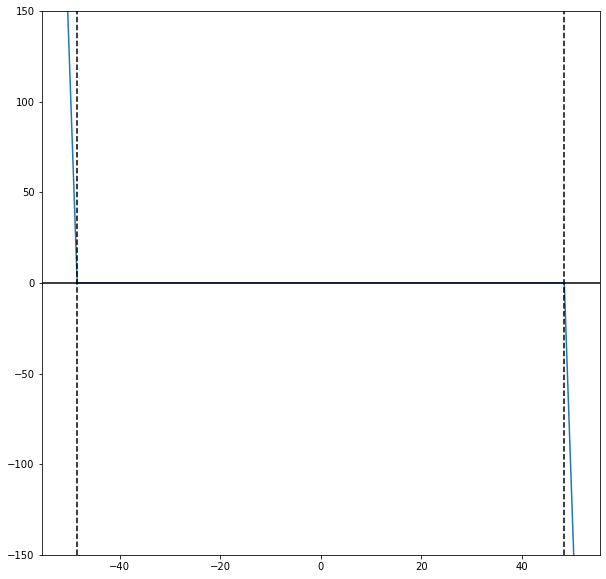

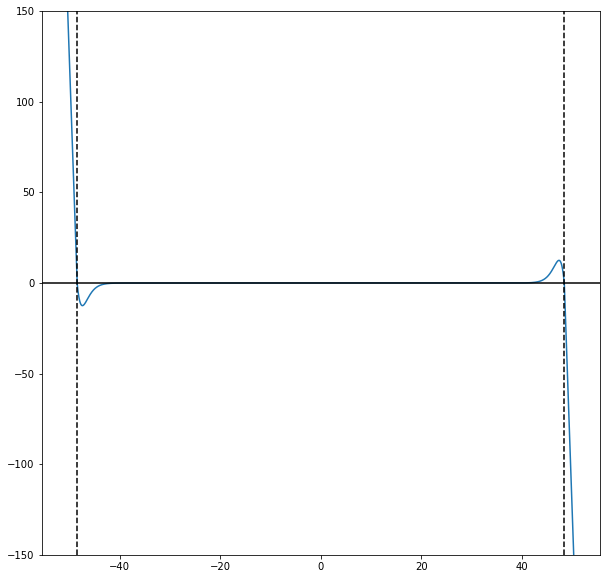

In [18]:
R = 50
A = 40
L= 0.1
RP = 1.5
x = np.linspace(-R-R/100, R+R/100, 10000)
fxrect=np.zeros(len(x))
fx1rect=np.zeros(len(x))
fxcirc=np.zeros(len(x))
fxcirc1=np.zeros(len(x))
for i in range(len(x)):
    fxrect[i] = plotWallPot(x[i], 0, R, A, RP)
    fx1rect[i] = plotWallPotOld(x[i], 0, R, A, RP)
    fxcirc[i] = plotWallPotCirc(x[i], 0, R, A, L, RP)
    fxcirc1[i] = plotWallPotCircOld(x[i], 0, R, A, L, RP)

plt.figure(figsize=(10,10))
plt.plot(x, fxcirc)
plt.axvline(x = R-RP, color = 'black', linestyle = "--",  label = 'axvline - full height')
plt.axvline(x = -R+RP, color = 'black', linestyle = "--", label = 'axvline - full height')
plt.axhline(y = 0, color = 'black', label = 'axvline - full height')
plt.ylim(-150, 150)
plt.savefig("CircWallatt2.svg")
plt.show()

plt.figure(figsize=(10,10))
plt.plot(x, fxcirc1)
plt.axvline(x = R-RP, color = 'black', linestyle = "--", label = 'axvline - full height')
plt.axvline(x = -R+RP, color = 'black', linestyle = "--", label = 'axvline - full height')
plt.axhline(y = 0, color = 'black', label = 'axvline - full height')
plt.ylim(-150, 150)
plt.savefig("CircWall2.svg")
plt.show()

plt.figure(figsize=(10,10))
plt.plot(x, fx1rect)
plt.axvline(x = R-RP, color = 'black', linestyle = "--", label = 'axvline - full height')
plt.axvline(x = -R+RP, color = 'black', linestyle = "--", label = 'axvline - full height')
plt.axhline(y = 0, color = 'black', label = 'axvline - full height')
plt.ylim(-150, 150)
plt.savefig("RectWall2.svg")
plt.show()

plt.figure(figsize=(10,10))
plt.plot(x, fxrect)
plt.axvline(x = R-RP, color = 'black', linestyle = "--", label = 'axvline - full height')
plt.axvline(x = -R+RP, color = 'black', linestyle = "--", label = 'axvline - full height')
plt.axhline(y = 0, color = 'black', label = 'axvline - full height')
plt.ylim(-150, 150)
plt.savefig("RectWallatt2.svg")
plt.show()

